In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import csv
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime
sns.set(font_scale=1.25, style="white")

## For all teams

In [15]:
years = [2015, 2016, 2017, 2018, 2019]
total_df = pd.DataFrame()
dfs = {}
headers = ['gameid', 'startTime', 'endTime', 'homeTeam', 'homeShots', 'awayTeam', 'awayShots']
dtypes = {'gameid': 'int', 'startTime': 'str', 'endTime':'str', 'homeTeam':'str','homeShots':'int', 'awayTeam':'str','awayShots':'int'}
parse_dates = ['startTime', 'endTime']
for year in years:
    df = pd.read_csv(f'{year}output.csv', skiprows=1, header=None,
                     names=headers, dtype=dtypes,
                     parse_dates=parse_dates)
    df['otLength'] = df['endTime'] - df['startTime']
    df['totalShots'] = df['homeShots'] + df['awayShots']
    df['otLength_min'] = df['otLength'].apply(pd.Timedelta.total_seconds)/60.0
    df['otShotsPerMin'] = df['totalShots'] / df['otLength_min']
    df['gameDate'] = df['startTime'].apply(pd.datetime.date)
    this_years_df = df[['gameid', 'gameDate', 'otShotsPerMin']]
    this_years_df = this_years_df[this_years_df['otShotsPerMin'] > 0]
    dfs[year] = this_years_df
    total_df = pd.concat([total_df, this_years_df])
    
total_df = total_df[total_df['otShotsPerMin'] > 0]
total_df = total_df[total_df['otShotsPerMin'] < 2]

<IPython.core.display.Javascript object>


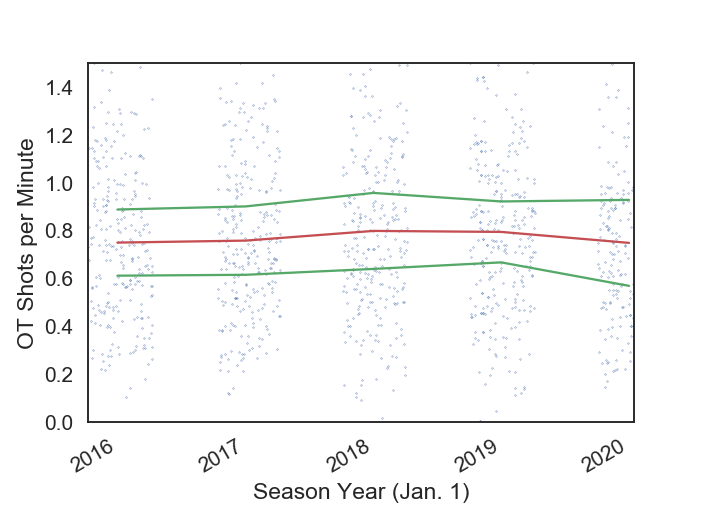

Text(0.5, 0, 'Season Year (Jan. 1)')

In [38]:
ax = total_df.plot(x='gameDate', y='otShotsPerMin', style='.', legend=False, ms=0.5)
ax.set_ylabel('OT Shots per Minute')
ax.set_ylim(0,1.5)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.YearLocator())

summary_df = pd.DataFrame(columns=['year', 'median', 'std'], )
for i, (y, df) in enumerate(dfs.items()):
    this_df = pd.DataFrame({'year': [datetime(year=y+1, month=1, day=1)], 'median': [df["otShotsPerMin"].median()], 'std': [df["otShotsPerMin"].std()]})
    summary_df = summary_df.append(this_df)

summary_df['med+std'] = summary_df['median'] + summary_df['std']/3
summary_df['med-std'] = summary_df['median'] - summary_df['std']/3
summary_df.plot(x='year', y=['median', 'med+std', 'med-std'], ax=ax, style=['r-', 'g-', 'g-'], legend=False)

ax.set_xlabel('Season Year (Jan. 1)')

## Just Bruins

In [54]:
years = [2015, 2016, 2017, 2018, 2019]
total_df = pd.DataFrame()
dfs = {}
headers = ['gameid', 'startTime', 'endTime', 'homeTeam', 'homeShots', 'awayTeam', 'awayShots']
dtypes = {'gameid': 'int', 'startTime': 'str', 'endTime':'str', 'homeTeam':'str','homeShots':'int', 'awayTeam':'str','awayShots':'int'}
parse_dates = ['startTime', 'endTime']
for year in years:
    df = pd.read_csv(f'{year}output.csv', skiprows=1, header=None,
                     names=headers, dtype=dtypes,
                     parse_dates=parse_dates)
    df = pd.concat([df[df['homeTeam'] == 'BOS'], df[df['awayTeam'] == 'BOS']])
    df['otLength'] = df['endTime'] - df['startTime']
    df['totalShots'] = df['homeShots'] + df['awayShots']
    df['otLength_min'] = df['otLength'].apply(pd.Timedelta.total_seconds)/60.0
    df['otShotsPerMin'] = df['totalShots'] / df['otLength_min']
    df['gameDate'] = df['startTime'].apply(pd.datetime.date)
    this_years_df = df[['gameid', 'gameDate', 'otShotsPerMin']]
    this_years_df = this_years_df[this_years_df['otShotsPerMin'] > 0]
    dfs[year] = this_years_df
    total_df = pd.concat([total_df, this_years_df])
    
total_df = total_df[total_df['otShotsPerMin'] > 0]
total_df = total_df[total_df['otShotsPerMin'] < 2]

<IPython.core.display.Javascript object>


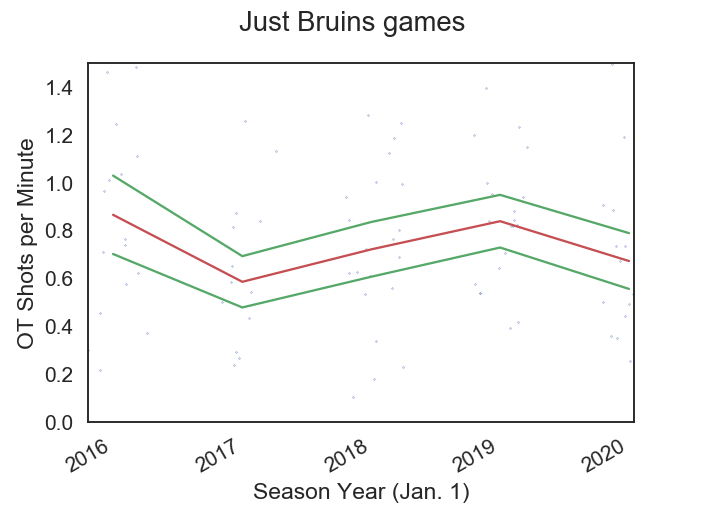

Text(0.5, 0.98, 'Just Bruins games')

In [57]:
ax = total_df.plot(x='gameDate', y='otShotsPerMin', style='.', legend=False, ms=0.5)
ax.set_ylabel('OT Shots per Minute')
ax.set_ylim(0,1.5)
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)
# Ensure ticks fall once every other week (interval=2) 
ax.xaxis.set_major_locator(mdates.YearLocator())

summary_df = pd.DataFrame(columns=['year', 'median', 'std'], )
for i, (y, df) in enumerate(dfs.items()):
    this_df = pd.DataFrame({'year': [datetime(year=y+1, month=1, day=1)], 'median': [df["otShotsPerMin"].median()], 'std': [df["otShotsPerMin"].std()]})
    summary_df = summary_df.append(this_df)

summary_df['med+std'] = summary_df['median'] + summary_df['std']/3
summary_df['med-std'] = summary_df['median'] - summary_df['std']/3
summary_df.plot(x='year', y=['median', 'med+std', 'med-std'], ax=ax, style=['r-', 'g-', 'g-'], legend=False)

ax.set_xlabel('Season Year (Jan. 1)')
plt.suptitle('Just Bruins games')